# Versuch 9
## Siedediagramm einer binären Mischung
Zu Beginn werden alle für die Auswertung notwendigen Module importiert. Welche Module könntet ihr wie üblich für die Auswertung brauchen?

Falls euch nachträglich Module einfallen, könnt ihr diese jederzeit hier ergänzen. Achtet dabei aber darauf, den entsprechenden Code dann auch erneut auszuführen!

In [1]:
from Hilfsdateien.importe_Bibliotheken import *

Außerdem könnten einige Naturkonstanten später in der Auswertung hilfreich sein. Diese können wir aus <code>scipy.constants</code> importieren. Hilfreich kann außerdem sein, weitere Konstanten wie den Studentschen $t$-Wert zu Beginn zu definieren.

In [2]:
from Hilfsdateien.importe_Konstanten import *

## Erster Auswertungsschritt
Wie üblich wollen wir zunächst alle unsere Messdaten einlesen. Mit welchem Befehl geschieht dies üblicherweise? Idealerweise besteht unser Datensatz aus einer Datei, in der eine Spalte die Temperatur und je eine Spalte die Brechungsindizes in den verschiedenen Aggregatzuständen bzw. Phasen enthält. Wenn ihr mögt, kann auch die Messnummer enthalten sein. Das Dezimaltrennzeichen sollte ein Punkt sein, Kommas müssten entweder manuell oder mittels Python konvertiert werden (__Schreibe wie__). Außerdem sollte ein 2D-Array erstellt werden, in dem jeweils das Volumen an Wasser und 1,4-Dioxan enthalten ist.

In [3]:
data = np.genfromtxt("data_v9/data.txt",usecols=(1,2,3,4),skip_header=1)
print(data)

[[99.1    1.423  1.423  1.423]
 [98.     1.421  1.422  1.422]
 [95.1    1.418  1.422  1.422]
 [93.2    1.416  1.421  1.421]
 [89.8    1.412  1.42   1.42 ]
 [86.8    1.41   1.416  1.416]
 [86.5    1.409  1.409  1.409]
 [86.4    1.409  1.402  1.402]
 [86.5    1.409  1.395  1.395]
 [86.6    1.409  1.384  1.384]
 [86.9    1.408  1.376  1.376]
 [87.1    1.407  1.37   1.369]
 [87.5    1.408  1.364  1.364]
 [98.9    1.334  1.333  1.333]
 [97.8    1.357  1.335  1.335]
 [94.5    1.384  1.34   1.34 ]
 [92.     1.401  1.346  1.346]]


In der nachfolgenden Auswertung werden wir oft den Messwert des Brechungsindex von reinem Dioxan und Wasser benötigen. Diese müsst ihr hier aus euren Messwerten als Variablen definieren. Auch sollte ein Array erstellt werden, welches die _Gesamtvolumina_ während der einzelnen Messungen enthält.

In [4]:
n_Diox = 1.423
n_Wasser = 1.333
V_ges = np.array([10.00,10.05,10.15,10.25,10.45,10.95,11.95,12.95,13.95,15.95,17.95,19.95,21.95,10.00,10.5,11.5,12.5]) #mL

***
Mir fehlt Datensatz für Kalibrierfunktion!
***
Außerdem soll eine Kalibrierfunktion des Volumens $V_1$ der Komponente 1 als Funktion des Brechnungsindex $n$ nach
\begin{align}
V_1(n) = a\cdot n^2 + b\cdot n + c
\end{align}
erstellt werden. Die Fittingvariablen $a$, $b$ und $c$ sollen nur von einem Parameter $P_3$ abhängen und sind folgendermaßen definiert:
\begin{align}
    a &= \frac{V_\mathrm{ges}}{(n_1 - n_2)\cdot (n_1 - P_3)} \\
    b &= -(n_2 + P_3)\cdot a \\
    c &= n_2\cdot a \cdot P_3
\end{align}

Hieraus sollt ihr für eine Funktion des Stoffmengenanteils $x_1(n)$ nach der Gleichung
\begin{align}
    x_1(n) = \frac{n^2 + \alpha\cdot n + \beta}{\gamma\cdot n^2 + \alpha\cdot\gamma\cdot n + \delta}
\end{align}
mit
\begin{align}
    \alpha &= \frac{b}{a} \\
    \beta &= \frac{c}{a} \\
    \gamma &= 1 - \frac{\rho_2 \cdot M_1}{\rho_1\cdot M_2} \\
    \delta &= \beta\cdot\gamma + \frac{V_\mathrm{ges}}{a}\cdot (1-\gamma) 
\end{align}.

Hierbei handelt es sich nicht mehr um eine einfache lineare Regression, sodass wir am besten curve_fit zum Fitten nutzen. Für dieses Modul müssen wir zunächst die Funktionen definieren, was nun eure Aufgabe ist. Größen wie die Dichten und molaren Massen sind in der Literatur zu suchen und müssen an die Funktion als Variablen übergeben werden!

In [5]:
def v1(n,P3):
    a = V_ges[0]/((n_Diox-n_Wasser)*(n_Diox-P3))
    b = -(n_Wasser+P3)*a
    c = n_Wasser*P3*a
    return a*n**2 + b*n + c


## Zweiter Auswertungsschritt
Nun können wir die Daten aus der Fittingfunktion an eine neue Funktion übergeben, welche uns bei einem bestimmten Brechungsindex den Stoffmengenanteil der Komponente 1 ausgibt. Anders als unsere Kalibrierfunktion, soll diesmal SymPy genutzt werden, da hierdurch die Fehlerrechnung für uns leichter wird.

Für SymPy müssen die einzelnen Variablen einer Funktion $f(a,b,c,\dots)$ erst als Symbole definiert werden, bevor die entsprechenden Variablen von SymPy genutzt werden können. Im Anschluss könnt ihr eine Variable erstellen, welche wie die von uns gewünschte Funktion heißt und aus den als Symbolen definierten Funktionsvariablen berechnet wird. Dies ist nun eure Aufgabe. Von dieser Funktion könnt ihr dann die Ableitung nach der entsprechenden Variablen bilden - dies wrd euch bei der Gaußschen Fehlerfortpflanzung helfen! Die Unsicherheit von $x_1$ könnt ihr so ebenfalls als eine Funktion definieren.

In [6]:
############################################################################################################################################
#Mangels gegebener Daten muss aus Werte aus älteren Protokollen zurückgefriffen werden, welche nachfolgend als Variablen aufgeführt sind!
#########################################################################################################################################
a,b,c =290.23876, -687.6743, 400.930554

M_Diox,M_Wasser = 88.11/1000,18.001/1000 #kg/mol
rho_Diox,rho_Wasser = 1034,1000 #kg/m^3
#Die Dichten müssen die Studenten in der Literatur suchen, 


n,dn,alph,bet,gamm,delt = symbols("n delta_n alpha beta gamma delta")
x1 = (n**2 + alph*n + bet)/(gamm*n**2 + alph*gamm*n + delt)
dx1 = sqrt((diff(x1,n)*dn)**2)

alpha = b/a
beta = c/a
gamma = 1-(rho_Wasser*M_Diox)/(rho_Diox*M_Wasser)
delta = gamma*beta + V_ges/a*(1-gamma)
print(delta)
x1 = lambdify([n,alph,bet,gamm,delt],x1,'numpy')
dx1 = lambdify([n,dn,alph,bet,gamm,delt],dx1,'numpy')
#popt,pcov = curve_fit(v1,n_arr,V_1_arr)

[-4.995 -4.994 -4.992 -4.991 -4.987 -4.979 -4.963 -4.947 -4.93  -4.898
 -4.865 -4.832 -4.8   -4.995 -4.987 -4.97  -4.954]


Nachdem wir nun mit SymPy eine aufrufbare Funktion erstellt haben, können wir ausgehend von den Brechungsindizes den Stoffmengenanteil $x_1$ in der Gasphase und in der Flüssigkeit bestimmen. Es bietet sich an, jeweils immer den Mittelwert der einzelnen Messungen einzusetzen.

In [7]:
x1_gas = x1(data[:,1],alpha,beta,gamma,delta)
x1_liq = x1(np.mean(np.array([data[:,3],data[:,2]]),axis=0),alpha,beta,gamma,delta)

dx1_gas = dx1(data[:,1],0.001,alpha,beta,gamma,delta)
dx1_liq = dx1(np.mean(np.array([data[:,3],data[:,2]]),axis=0),0.001,alpha,beta,gamma,delta)

Eure Aufgabe ist es nun, das Siedediagramm zu erstellen, also die Temperatur gegen den Stoffmengenanteil von Dioxan aufzutragen. Denkt auch daran, die Fehlerbalken einzuzeichnen!

[1.041 0.895 0.725 0.632 0.495 0.402 0.316 0.267 0.232 0.183 0.147 0.123
 0.109 0.001 0.053 0.145 0.222]


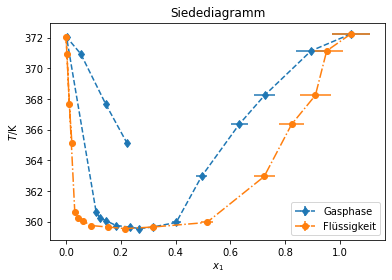

In [8]:
print(x1_gas)
plt.errorbar(x1_gas,data[:,0]+273.15,xerr=dx1_gas,yerr=0.1,ls='--',marker='d',label="Gasphase")
plt.errorbar(x1_liq,data[:,0]+273.15,xerr=dx1_liq,yerr=0.1,ls='-.',marker="o",label="Flüssigkeit")
plt.legend()
plt.ylabel("$T$/K")
plt.xlabel("$x_1$")
plt.title("Siedediagramm")
plt.show()
plt.close()

Der azeotrope Punkt ist der Punkt, an dem die beiden Kurven sich im Idealfall schneiden. __SCHAUE, WIE WIR DAS SINNVOLL MACHEN!__

Eine weitere Möglichkeit ist, eine Gerade des Typs $x_{1,\mathrm{gas}} = x_{1,\mathrm{liq}}$ zu erstellen und den Schnittpunkt der Messwerte mit dieser Geraden zu bestimmen. __continue__

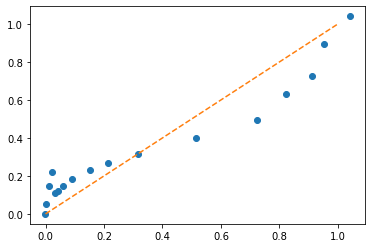

In [9]:
from scipy.interpolate import UnivariateSpline
plt.plot(x1_liq,x1_gas,"o")
plt.plot(np.arange(0,1,1.0e-3),np.arange(0,1,1.0e-3),"--")
plt.show()
plt.close()

## Dritter Auswertungsschritt
Mit Hilfe des Stoffmengenanteils $x_1$ sind nun die isobaren Aktiviätskoeffizienten $f_1$ und $f_2$ zu bestimmen. Diese können für eine Komponente $\iota$ aus den Stoffmengenanteilen $x_\iota^\mathrm{gas}$ bzw. $x_\iota^\mathrm{liq}$ in der Gasphase bzw. Flüssigkeit aus dem Gesamtdruck $p$ und dem Dampfdruck $p_\iota^*$ der reinen Komponente am Siedepunkt erhalten werden (siehe nachfolgende Gleichung)
\begin{align}
    f_\iota = \frac{x_\iota^\mathrm{gas}\cdot p_\mathrm{gas}}{x_\iota^\mathrm{liq}\cdot p_\iota^*}
\end{align}.

Den Dampfdruck $p_\iota^*$ müsst ihr der Literatur entnehmen. Nachfolgend wird ein Ansatz nach der Antoine-Gleichung bei einer Temperatur $T$ gewählt. Diese lautet
\begin{align}
    p_\iota^* = 10^{\left(A-\frac{B}{T+C}\right)},
\end{align}
die Konstanten $A, B, C$ müssen der Literatur entnommen werden. Es bietet sich an, erneut SymPy für die Implementierung der Funktion zu nutzen. $A$, $B$ und $C$ müssen erneut als „Symbole“ deklariert werden und erneut können wir mittels SymPy die Ableitungen für die Gaußsche Fehlerfortpflanzung bestimmen. Nachdem die Ausdrücke mittels eines weiteren SymPy-Befehls in aufrufbare Funktionen überführt wurden (GIYF, eine [anonyme Funktion](https://de.wikipedia.org/wiki/Anonyme_Funktion) wird oftmals lambda-Funktion genannt!), können wir unsere Messwerte an diese übergeben und so $p^*$ berechnen.

In [15]:
A,B,C,T,dT = symbols('A B C T ΔT')
p_star = 10**(A-B/(T+C))
dp_star = sqrt((diff(p_star,T)*dT)**2)

p_star = lambdify([A,B,C,T],p_star,'numpy')
dp_star = lambdify([A,B,C,T,dT],dp_star,'numpy')

p_star_wasser = p_star(5.08354,1663.125,-45.662,data[:,0])
dp_star_wasser = dp_star(5.08354,1663.125,-45.662,data[:,0],0.05)

Analog wird für $f_\iota$ und dessen Unsicherheit $\Delta f_\iota$ eine entsprechende Funktion mittels SymPy erstellt. Erneut sollte $\Delta f_\iota$ nicht manuell eingetippt werden, sondern ausgehend von $f_\iota$ mittels SymPy berechnet werden. 

In [13]:
xg,dxg,xl,dxl,pges,dpges,pstar,dpstar = symbols('x_g Δx_g x_l Δx_l p_ges Δp_ges p* Δp*')
f = xg*pges/(xl*pstar)
df = sqrt((diff(f,xg)*dxg)**2 + (diff(f,xl)*dxl)**2 + (diff(f,pges)*dpges)**2 + (diff(f,pstar)*dpstar)**2)

f = lambdify([xg,xl,pges,pstar],f,'numpy')
df = lambdify([xg,dxg,xl,dxl,pges,dpges,pstar,dpstar],df,'numpy')

## Vierter Auswertungsschritt
Im nächsten Auswertungsschritt ist die Zusatzgibbsenergie $\mu_{\iota,\mathrm{E}}$ zu bestimmen. Diese wird nach der im Skript enthaltenen Gleichung
\begin{align}
    \mu_{\iota,\mathrm{E}} = R\cdot T\cdot\ln\left(f_\iota\right)
\end{align}
bzw. 
\begin{align}
    \mu_\mathrm{E} = R\cdot T\cdot\left(\sum_\iota x_\iota \cdot \ln\left(f_\iota\right)\right)
\end{align}
erhalten. Bestimmt $\mu_\mathrm{E}$ mittels SymPy! Es ist wichtig, dass _nicht_ <code>np.log</code> genutzt wird, stattdessen ist immer die entsprechende Funktion aus SymPy zu nutzen.

In [16]:
x1,dx1,x2,dx2,f1,df1,f2,df2 = symbols('x1 Δx1 x2 Δx2 f1 Δf1 f2 Δf2')

mu_E = R*T*(x1*log(f1) + x2*log(f2))
dmu_E = sqrt((diff(mu_E,T)*dT)**2 + (diff(mu_E,x1)*dx1)**2 + (diff(mu_E,x2)*dx2)**2 + (diff(mu_E,f1)*df1)**2 + (diff(mu_E,f2)*df2)**2)

mu_E = lambdify([x1,x2,f1,f2],mu_E,'numpy')
dmu_E = lambdify([x1,dx1,x2,dx2,f1,df1,f2,df2],dmu_E,'numpy')

Als nächstes ist es von euch gefordert, $mu_\mathrm{E}$ gegen $x_1$ aufzutragen. Wie immer: Fehlerbalken, Achsenbeschriftung, Titel, etc. nicht vergessen!

In [17]:
#plt.errorbar(x1,mu,xerr=x1err,yerr=muerr,marker='d',ls='None')
#plt.xlabel("$x_{1,\mathrm{liq}}$")
#plt.ylabel("$\mu_\mathrm{E}$ / $\mathrm{J}\cdot\mathrm{\mol}^{-1}$")
#plt.show()
#plt.close()

## Fünfter Auswertungsschritt
Abschließend soll die Güte der Messergebnisse überprüft werden. Hierzu habt ihr das Integral
\begin{align}
    \int\limits_{0}^{1} \ln\left(\frac{f_1}{f_2}\right)\mathrm{d}x_{1,\mathrm{liq}}
\end{align}
zu bestimmen. Dieses liegt für ideale Messwerte bei null. Da unsere realen Messwerte jedoch keiner Funktion gehorchen, über die wir integrieren können, werden wir stattdessen eine numerische Integration nach der [Trapezregel](https://www.spektrum.de/lexikon/mathematik/numerische-integration/9304) durchführen. Hierzu wird der Befehl <code>trapz</code> aus <code>scipy.integrate</code> genutzt, welcher uns das Ergebnis nach der entsprechenden Regel liefert.

Zunächst sollte jedoch $\ln\left(\frac{f_1}{f_2}\right)$ und die Unsicherheit von diesem Bruch ermittelt werden, da außerdem eine Auftragung von $\ln\left(\frac{f_1}{f_2}\right)$ gegen $x_{1,\mathrm{liq}}$ erwünscht ist.

In [ ]:
#integral = trapz(np.log(f1/f2),x1)

Als letzter Schritt soll erneut eine Auftragung angefertigt werden.